In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [2]:
train = pd.read_csv('train.csv', parse_dates = ['date'])
test = pd.read_csv('test.csv', parse_dates = ['date'])
submissions = pd.read_csv('SampleSubmission.csv')
vd = pd.read_csv('VariableDefinitionsHotspot.csv')

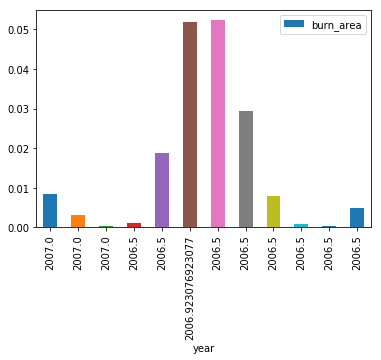

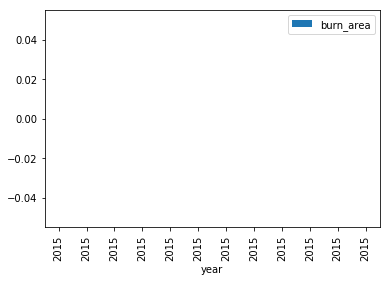

In [3]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

# Date variables
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
test.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

In [4]:
train = train.drop(['population_density', 'ID', 'date'], axis=1)
test = test.drop(['population_density', 'ID', 'burn_area', 'date'], axis=1)

In [5]:
Labels = np.array(train['burn_area'])
print(Labels)

[0.00368827 0.         0.         ... 0.         0.         0.        ]


In [6]:
train = train.drop('burn_area', axis=1)

In [7]:
print(train.shape)

(626644, 30)


In [8]:
print(test.shape)

(137556, 30)


In [9]:
Features = np.array(train)
test_enc = np.array(test)

In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :])
Features[:, :] = scaler.transform(Features[:, :])
print(Features[:, :])

[[-1.73159757  0.43753111  1.85451289 ...  0.1322863  -0.75212307
  -1.68075649]
 [-1.73069097  0.49456614  1.85383075 ...  0.04842358 -0.75212307
  -1.68075649]
 [-1.72978438  0.43650345  1.80403446 ...  0.23004017 -0.75212307
  -1.68075649]
 ...
 [ 1.72978438  1.48445787 -2.34861303 ...  1.04469196  1.57520115
   1.60372824]
 [ 1.73069097  1.54174981 -2.34565709 ...  0.77124435  1.57520115
   1.60372824]
 [ 1.73159757  1.5450897  -2.39522601 ...  0.63133742  1.57520115
   1.60372824]]


In [11]:
test_enc = np.array(test)

scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :])
test_enc[:, :] = scaler1.transform(test_enc[:, :])
#print(test_enc[:, :])

In [13]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(99880)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [14]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [15]:
xg_reg = xgb.XGBRegressor(objective = 'reg:logistic', n_estimators = 200, seed = 123, max_depth = 8,
                           learning_rate=0.1, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

eval_set = [(x_train1, y_train1), (x_test, y_test)]
xg_reg.fit(x_train1, y_train1, eval_metric="rmse", eval_set=eval_set, verbose=True, early_stopping_rounds = 10)

[0]	validation_0-rmse:0.61493	validation_1-rmse:0.61503
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.55202	validation_1-rmse:0.55211
[2]	validation_0-rmse:0.49655	validation_1-rmse:0.49660
[3]	validation_0-rmse:0.44740	validation_1-rmse:0.44733
[4]	validation_0-rmse:0.40356	validation_1-rmse:0.40337
[5]	validation_0-rmse:0.36426	validation_1-rmse:0.36412
[6]	validation_0-rmse:0.32894	validation_1-rmse:0.32888
[7]	validation_0-rmse:0.29728	validation_1-rmse:0.29726
[8]	validation_0-rmse:0.26881	validation_1-rmse:0.26879
[9]	validation_0-rmse:0.24319	validation_1-rmse:0.24328
[10]	validation_0-rmse:0.22030	validation_1-rmse:0.22031
[11]	validation_0-rmse:0.19959	validation_1-rmse:0.19967
[12]	validation_0-rmse:0.18097	validation_1-rmse:0.18109
[13]	validation_0-rmse:0.16432	validation_1-rmse:0.16441
[14]	validation_0-rmse:0.14927	validation_1-rmse:0.14

[141]	validation_0-rmse:0.02394	validation_1-rmse:0.02738
[142]	validation_0-rmse:0.02390	validation_1-rmse:0.02736
[143]	validation_0-rmse:0.02376	validation_1-rmse:0.02727
[144]	validation_0-rmse:0.02370	validation_1-rmse:0.02725
[145]	validation_0-rmse:0.02366	validation_1-rmse:0.02721
[146]	validation_0-rmse:0.02362	validation_1-rmse:0.02719
[147]	validation_0-rmse:0.02354	validation_1-rmse:0.02714
[148]	validation_0-rmse:0.02346	validation_1-rmse:0.02710
[149]	validation_0-rmse:0.02345	validation_1-rmse:0.02709
[150]	validation_0-rmse:0.02336	validation_1-rmse:0.02702
[151]	validation_0-rmse:0.02331	validation_1-rmse:0.02698
[152]	validation_0-rmse:0.02326	validation_1-rmse:0.02695
[153]	validation_0-rmse:0.02316	validation_1-rmse:0.02685
[154]	validation_0-rmse:0.02310	validation_1-rmse:0.02683
[155]	validation_0-rmse:0.02308	validation_1-rmse:0.02683
[156]	validation_0-rmse:0.02291	validation_1-rmse:0.02671
[157]	validation_0-rmse:0.02285	validation_1-rmse:0.02667
[158]	validati

XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=200, n_jobs=0, num_parallel_tree=1,
       objective='reg:logistic', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [16]:
preds = xg_reg.predict(x_train_val)

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train_val, preds)**0.5

0.025004494402654523

In [18]:
test_pred = xg_reg.predict(test_enc)

In [19]:
submissions.Prediction = test_pred
submissions.to_csv('HotspotSubmission1.csv', index=False)

In [1]:
0.025004494402654523**0.5

0.15812809491881738